<a href="https://colab.research.google.com/github/Abhiram88/vaccination/blob/main/H1N1_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dataprep

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime
import os

import numpy as np
from dataprep.eda.missing import plot_missing

from sklearn.model_selection import train_test_split



NumExpr defaulting to 2 threads.


In [4]:
training_features_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/training_set_features.csv'
training_label_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/training_set_labels.csv'
test_features_url = 'https://raw.githubusercontent.com/Abhiram88/vaccination/main/test_set_features.csv'

In [5]:
training_features = pd.read_csv(training_features_url)
training_labels = pd.read_csv(training_label_url)

test_features = pd.read_csv(test_features_url)

In [ ]:
training_features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [ ]:
training_labels.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [ ]:
training_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

  0%|                                                                                          | 0/353 [00:00<…


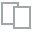
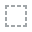
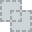
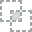
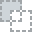
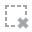
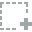
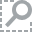
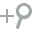
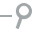
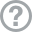
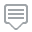
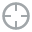
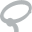
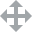
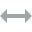
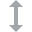
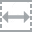
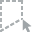
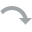
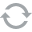
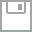
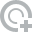
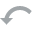
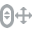
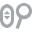
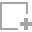
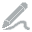
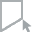
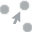
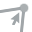
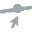

In [ ]:
plot_missing(training_features)

In [ ]:
'''
training_features["h1n1_concern"].fillna(value=2.0, inplace = True)
test_features["h1n1_concern"].fillna(value=2.0, inplace = True)

training_features["h1n1_knowledge"].fillna(value=1.0, inplace = True)
test_features["h1n1_knowledge"].fillna(value=1.0, inplace = True)

training_features["behavioral_antiviral_meds"].fillna(value=0.0, inplace = True)
test_features["behavioral_antiviral_meds"].fillna(value=0.0, inplace = True)

training_features["behavioral_avoidance"].fillna(value=1.0, inplace = True)
test_features["behavioral_avoidance"].fillna(value=1.0, inplace = True)

training_features["behavioral_face_mask"].fillna(value=0.0, inplace = True)
test_features["behavioral_face_mask"].fillna(value=0.0, inplace = True)

training_features["behavioral_wash_hands"].fillna(value=1.0, inplace = True)
test_features["behavioral_wash_hands"].fillna(value=1.0, inplace = True)

training_features["behavioral_large_gatherings"].fillna(value=0.0, inplace = True)
test_features["behavioral_large_gatherings"].fillna(value=0.0, inplace = True)

training_features["behavioral_outside_home"].fillna(value=0.0, inplace = True)
test_features["behavioral_outside_home"].fillna(value=0.0, inplace = True)

training_features["behavioral_touch_face"].fillna(value=1.0, inplace = True)
test_features["behavioral_touch_face"].fillna(value=1.0, inplace = True)


training_features["doctor_recc_h1n1"].fillna(value=0.0, inplace = True)
test_features["doctor_recc_h1n1"].fillna(value=0.0, inplace = True)

training_features["doctor_recc_seasonal"].fillna(value=0.0, inplace = True)
test_features["doctor_recc_seasonal"].fillna(value=0.0, inplace = True)

training_features["chronic_med_condition"].fillna(value=0.0, inplace = True)
test_features["chronic_med_condition"].fillna(value=0.0, inplace = True)

training_features["child_under_6_months"].fillna(value=0.0, inplace = True)
test_features["child_under_6_months"].fillna(value=0.0, inplace = True)

training_features["health_worker"].fillna(value=0.0, inplace = True)
test_features["health_worker"].fillna(value=0.0, inplace = True)
'''

In [ ]:
training_features.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
numeric_columns = training_features._get_numeric_data().columns.to_list()

In [ ]:
for column in numeric_columns:
    mean_value = round(training_features[column].mean())
    training_features[column].fillna(value = mean_value, inplace=True)

  0%|                                                                                          | 0/353 [00:00<…


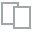
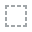
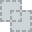
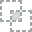
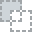
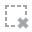
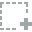
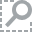
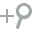
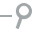
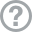
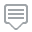
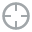
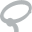
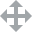
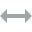
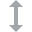
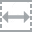
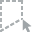
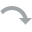
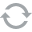
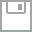
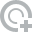
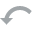
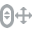
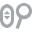
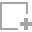
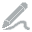
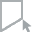
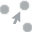
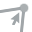
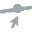

In [ ]:
plot_missing(training_features)

  0%|                                                                                          | 0/257 [00:00<…


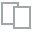
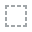
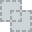
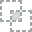
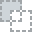
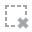
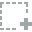
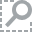
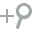
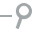
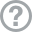
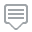
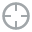
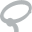
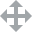
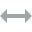
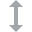
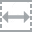
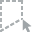
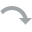
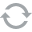
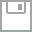
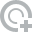
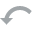
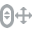
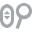
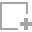
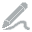
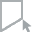
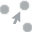
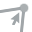
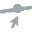

In [ ]:
numeric_df = training_features.select_dtypes(include=['float64', 'int64'])
len(numeric_df.columns)
plot_missing(numeric_df)

  0%|                                                                                          | 0/273 [00:00<…


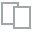
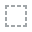
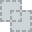
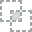
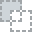
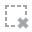
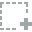
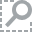
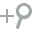
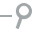
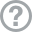
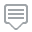
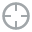
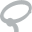
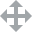
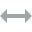
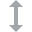
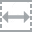
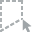
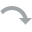
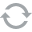
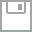
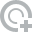
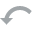
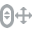
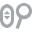
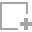
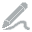
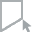
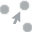
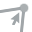
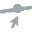

In [ ]:
numeric_df = numeric_df.merge(training_labels, on='respondent_id')
plot_missing(numeric_df)

In [ ]:
numeric_df.drop('respondent_id', axis=1, inplace=True)
numeric_df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               1.0             0.0                        0.0   
1               3.0             2.0                        0.0   
2               1.0             1.0                        0.0   
3               1.0             1.0                        0.0   
4               2.0             1.0                        0.0   
...             ...             ...                        ...   
26702           2.0             0.0                        0.0   
26703           1.0             2.0                        0.0   
26704           2.0             2.0                        0.0   
26705           1.0             1.0                        0.0   
26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
0                        1.0               0.0  ...   
1                        1.0               0.0  ...   
2                        0.0               0.0  ...   
3                        0.0               0.0  ...   
4                        1.0               0.0  ...   
...                      ...               ...  ...   
26702                    0.0               0.0  ...   
26703                    0.0               1.0  ...   
26704                    1.0               0.0  ...   
26705                    1.0               0.0  ...   
26706                    0.0               0.0  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              3.0                1.0   
1                              5.0                4.0   
2                              3.0                1.0   
3                              3.0                3.0   
4                              3.0                3.0   
...                            ...                ...   
26702                          3.0                1.0   
26703                          4.0                2.0   
26704                          4.0                4.0   
26705                          3.0                1.0   
26706                          5.0                1.0   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
0                              2.0                          2.0   
1                              4.0                          4.0 

In [ ]:
numeric_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [ ]:
test = pd.pivot_table(numeric_df, index=['h1n1_vaccine'], values=numeric_df.columns, aggfunc=np.mean)
test

behavioral_antiviral_meds  behavioral_avoidance  \
h1n1_vaccine                                                    
0                              0.044216              0.716921   
1                              0.065386              0.767889   

              behavioral_face_mask  behavioral_large_gatherings  \
h1n1_vaccine                                                      
0                         0.059668                     0.352969   
1                         0.103278                     0.374163   

              behavioral_outside_home  behavioral_touch_face  \
h1n1_vaccine                                                   
0                            0.330861               0.661627   
1                            0.356362               0.742510   

              behavioral_wash_hands  child_under_6_months  \
h1n1_vaccine                                                
0                          0.811201              0.070651   
1                          0.880331              0.114910   

              chronic_med_condition  doctor_recc_h1n1  ...  health_worker  \
h1n1_vaccine                                           ...                  
0                          0.251129          0.120240  ...       0.081396   
1                          0.353895          0.507402  ...       0.209200   

              household_adults  household_children  opinion_h1n1_risk  \
h1n1_vaccine                                                            
0                     0.884705            0.540817           2.124994   
1                     0.898132            0.531900           3.125661   

              opinion_h1n1_sick_from_vacc  opinion_h1n1_vacc_effective  \
h1n1_vaccine                                                             
0                                2.299957                     3.713926   
1                                2.546704                     4.367642   

              opinion_seas_risk  opinion_seas_sick_from_vacc  \
h1n1_vaccine                                                   
0                      2.542148                     2.109970   
1                      3.400775                     2.137117   

              opinion_seas_vacc_effective  seasonal_vaccine  
h1n1_vaccine                                                 
0                                3.926069          0.367898  
1                                4.394254          0.827811  

[2 rows x 24 columns]

In [ ]:
h1_column = []
seasonal_column = []

for column in numeric_df.columns:
    if 'sea' not in column:
        h1_column.append(column)
for column in numeric_df.columns:
    if 'h1' not in column:
        seasonal_column.append(column)

In [ ]:
h1_data = numeric_df[h1_column]
seasonal_data = numeric_df[seasonal_column]

In [ ]:
h1_vaccine_1 = h1_data.loc[numeric_df['h1n1_vaccine'] == 1]
h1_vaccine_0 = h1_data.loc[numeric_df['h1n1_vaccine'] == 0]

sea_vaccine_1 = seasonal_data.loc[numeric_df['seasonal_vaccine'] == 1]
sea_vaccine_0 = seasonal_data.loc[numeric_df['seasonal_vaccine'] == 0]

In [ ]:
def calculate_mean(x):
    return x.mean()

In [ ]:
h1_vaccine_1_chart = h1_vaccine_1.apply(calculate_mean, axis=0)
h1_vaccine_0_chart = h1_vaccine_0.apply(calculate_mean, axis=0)

sea_vaccine_1_chart = sea_vaccine_1.apply(calculate_mean, axis=0)
sea_vaccine_0_chart = sea_vaccine_0.apply(calculate_mean, axis=0)

In [ ]:
h1_vaccine_0_chart_labels = h1_vaccine_0_chart.index
h1_vaccine_0_chart_values = h1_vaccine_0_chart.values

h1_vaccine_1_chart_labels = h1_vaccine_1_chart.index
h1_vaccine_1_chart_values = h1_vaccine_1_chart.values

sea_vaccine_1_chart_labels = sea_vaccine_1_chart.index
sea_vaccine_1_chart_values = sea_vaccine_1_chart.values


sea_vaccine_0_chart_labels = sea_vaccine_0_chart.index
sea_vaccine_0_chart_values = sea_vaccine_0_chart.values

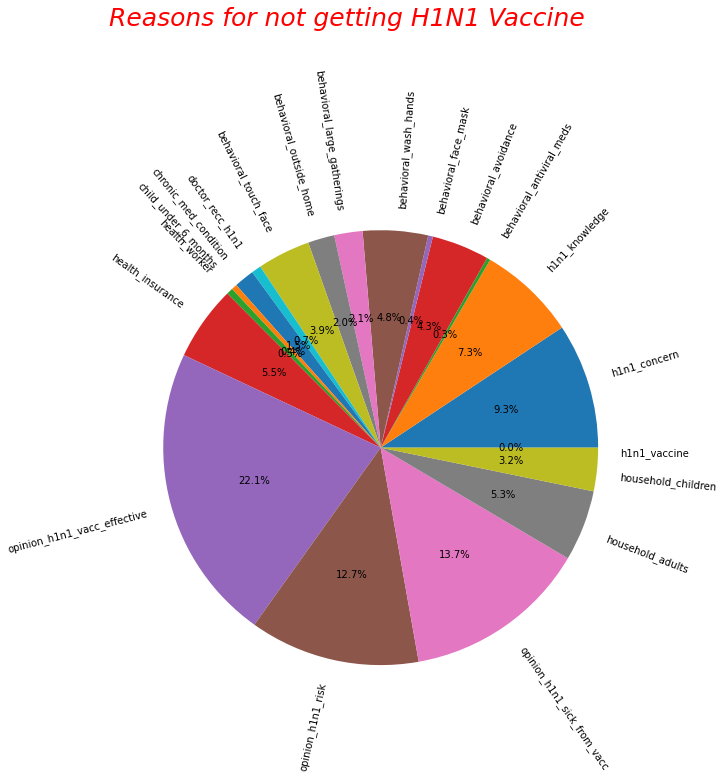

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(h1_vaccine_0_chart_values, labels = h1_vaccine_0_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for not getting H1N1 Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


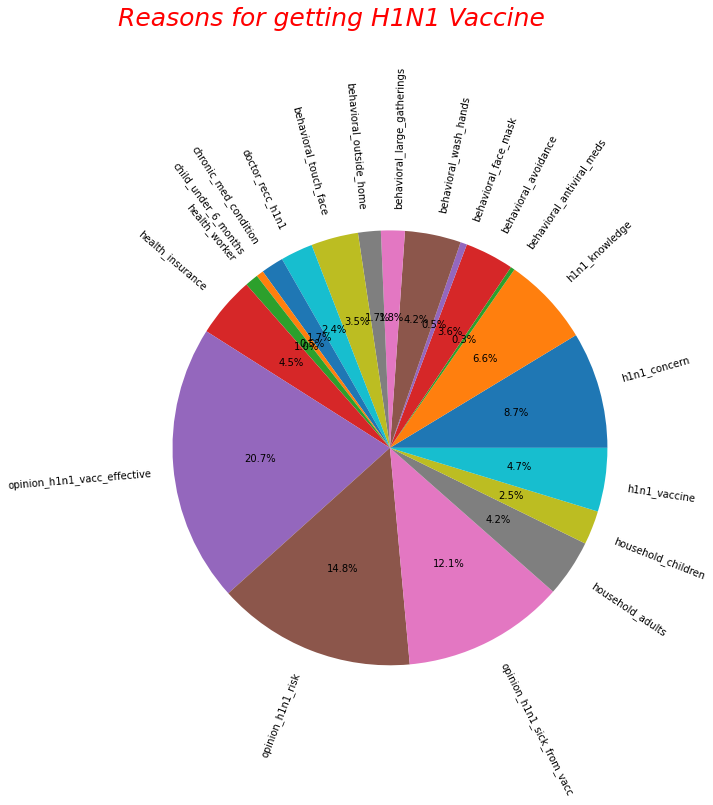

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(h1_vaccine_1_chart_values, labels = h1_vaccine_1_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for getting H1N1 Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


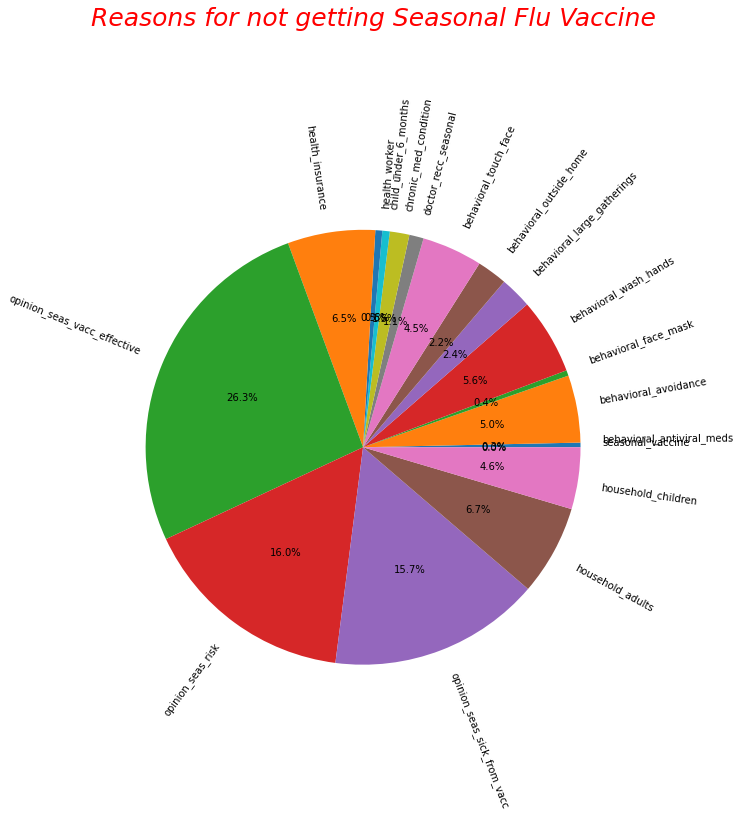

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(sea_vaccine_0_chart_values, labels = sea_vaccine_0_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for not getting Seasonal Flu Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


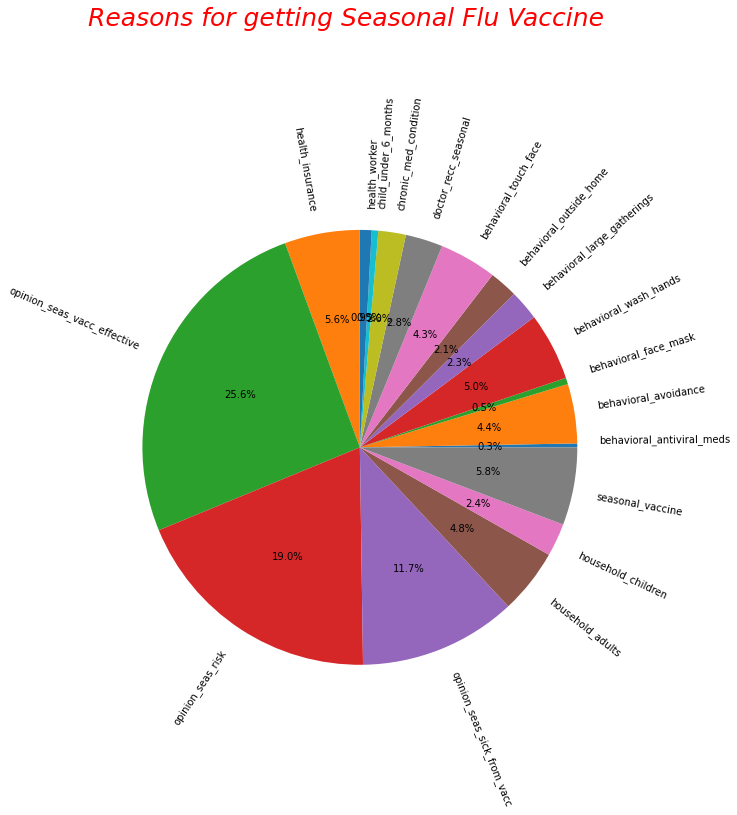

In [ ]:
fig = plt.figure(figsize =(10, 10))

plt.pie(sea_vaccine_1_chart_values, labels = sea_vaccine_1_chart_labels, autopct='%1.1f%%',
       rotatelabels =True)
plt.title(label = "Reasons for getting Seasonal Flu Vaccine", 
          loc="left", fontstyle='italic', pad='150', color='red',
          fontsize = 25, fontweight=50)

plt.show()


In [ ]:
training_features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [ ]:
training_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [ ]:
training_features.isnull().sum()

respondent_id                      0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance               0
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                   0
doctor_recc_seasonal               0
chronic_med_condition              0
child_under_6_months               0
health_worker                      0
health_insurance                   0
opinion_h1n1_vacc_effective        0
opinion_h1n1_risk                  0
opinion_h1n1_sick_from_vacc        0
opinion_seas_vacc_effective        0
opinion_seas_risk                  0
opinion_seas_sick_from_vacc        0
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
training_features.fillna('Unknown', inplace=True)
training_features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
object_columns = training_features.select_dtypes(['object'])
object_columns.head()

age_group         education   race     sex             income_poverty  \
0  55 - 64 Years        < 12 Years  White  Female              Below Poverty   
1  35 - 44 Years          12 Years  White    Male              Below Poverty   
2  18 - 34 Years  College Graduate  White    Male  <= $75,000, Above Poverty   
3      65+ Years          12 Years  White  Female              Below Poverty   
4  45 - 54 Years      Some College  White  Female  <= $75,000, Above Poverty   

  marital_status rent_or_own   employment_status hhs_geo_region  \
0    Not Married         Own  Not in Labor Force       oxchjgsf   
1    Not Married        Rent            Employed       bhuqouqj   
2    Not Married         Own            Employed       qufhixun   
3    Not Married        Rent  Not in Labor Force       lrircsnp   
4        Married         Own            Employed       qufhixun   

                 census_msa employment_industry employment_occupation  
0                   Non-MSA             Unknown               Unknown  
1  MSA, Not Principle  City            pxcmvdjn              xgwztkwe  
2  MSA, Not Principle  City            rucpziij              xtkaffoo  
3       MSA, Principle City             Unknown               Unknown  
4  MSA, Not Principle  City            wxleyezf              emcorrxb

In [ ]:
training_features.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [ ]:
object_columns['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College',
       'Unknown'], dtype=object)

In [ ]:
object_columns['age_group'].unique()

array(['55 - 64', '35 - 44', '18 - 34', '65+', '45 - 54'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
encoded_values = onehot_encoder.fit_transform(training_features[['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']]).toarray()


In [ ]:
encoded_values.shape

(26707, 89)

In [ ]:
encoded_labels = onehot_encoder.categories_
#encoded_labels = onehot_encoder.categories_
#encoded_labels.shape
encoded_labels

[array(['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years',
        '65+ Years'], dtype=object),
 array(['12 Years', '< 12 Years', 'College Graduate', 'Some College',
        'Unknown'], dtype=object),
 array(['Black', 'Hispanic', 'Other or Multiple', 'White'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['<= $75,000, Above Poverty', '> $75,000', 'Below Poverty',
        'Unknown'], dtype=object),
 array(['Married', 'Not Married', 'Unknown'], dtype=object),
 array(['Own', 'Rent', 'Unknown'], dtype=object),
 array(['Employed', 'Not in Labor Force', 'Unemployed', 'Unknown'],
       dtype=object),
 array(['atmpeygn', 'bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'kbazzjca',
        'lrircsnp', 'lzgpxyit', 'mlyzmhmf', 'oxchjgsf', 'qufhixun'],
       dtype=object),
 array(['MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'],
       dtype=object),
 array(['Unknown', 'arjwrbjb', 'atmlpfrs', 'cfqqtusy', 'dotnnunm',
        'fcxhlnwr', 'haxffmxo', 'ldnlellj',

In [ ]:
encoded_columns = []
for i in encoded_labels:
    for j in range(len(i)):
        encoded_columns.append(i[j])

In [ ]:
encoded_data = pd.DataFrame(encoded_values, columns=encoded_columns)
encoded_data.head()

18 - 34 Years  35 - 44 Years  45 - 54 Years  55 - 64 Years  65+ Years  \
0            0.0            0.0            0.0            1.0        0.0   
1            0.0            1.0            0.0            0.0        0.0   
2            1.0            0.0            0.0            0.0        0.0   
3            0.0            0.0            0.0            0.0        1.0   
4            0.0            0.0            1.0            0.0        0.0   

   12 Years  < 12 Years  College Graduate  Some College  Unknown  ...  \
0       0.0         1.0               0.0           0.0      0.0  ...   
1       1.0         0.0               0.0           0.0      0.0  ...   
2       0.0         0.0               1.0           0.0      0.0  ...   
3       1.0         0.0               0.0           0.0      0.0  ...   
4       0.0         0.0               0.0           1.0      0.0  ...   

   qxajmpny  rcertsgn  tfqavkke  ukymxvdu  uqqtjvyb  vlluhbov  xgwztkwe  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       1.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   xqwwgdyp  xtkaffoo  xzmlyyjv  
0       0.0       0.0       0.0  
1       0.0       0.0       0.0  
2       0.0       1.0       0.0  
3       0.0       0.0       0.0  
4       0.0       0.0       0.0  

[5 rows x 89 columns]

In [ ]:
training_features.drop(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation', 'respondent_id'], axis=1, inplace=True)
final_df = pd.concat([training_features, encoded_data], axis=1)
final_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  qxajmpny  rcertsgn  tfqavkke  \
0                    1.0               0.0  ...       0.0       0.0       0.0   
1                    1.0               0.0  ...       0.0       0.0       0.0   
2                    0.0               0.0  ...       0.0       0.0       0.0   
3                    0.0               0.0  ...       0.0       0.0       0.0   
4                    1.0               0.0  ...       0.0       0.0       0.0   

   ukymxvdu  uqqtjvyb  vlluhbov  xgwztkwe  xqwwgdyp  xtkaffoo  xzmlyyjv  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       1.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       1.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 112 columns]

In [ ]:
training_labels.drop('respondent_id', axis=1, inplace=True)

In [ ]:
training_labels.columns

Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [ ]:
training_features.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

# For H1N1

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), step = 1)
rfe_selector.fit(final_df, training_labels['h1n1_vaccine'])


C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

RFE(estimator=LogisticRegression())

In [ ]:
final_df.columns[rfe_selector.get_support()]

Index(['behavioral_antiviral_meds', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'doctor_recc_seasonal', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '< 12 Years',
       'Black', 'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Poverty', 'Unknown', 'Married', 'Not Married', 'Unknown', 'Own',
       'Rent', 'Unknown', 'Employed', 'Not in Labor Force', 'Unemployed',
       'Unknown', 'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA',
       'Unknown', 'arjwrbjb', 'atmlpfrs', 'cfqqtusy', 'dotnnunm', 'haxffmxo',
       'ldnlellj', 'mcubkhph', 'pxcmvdjn', 'rucpziij', 'vjjrobsf', 'wlfvacwt',
       'xqicxuve', 'cmhcxjea', 'dcjcmpih', 'dlvbwzss', 'hfxkjkmi', 'kldqjyjy',
       'pvmttkik', 'qxajmpny', 'rcertsgn', 'tfqavkke', 'ukymxvdu', 'uqqtjvyb'],
      dtype='object')

In [ ]:
h1n1_training_set = final_df[final_df.columns[rfe_selector.get_support()]]
h1n1_training_set.head()

behavioral_antiviral_meds  behavioral_large_gatherings  doctor_recc_h1n1  \
0                        0.0                          0.0               0.0   
1                        0.0                          0.0               0.0   
2                        0.0                          0.0               0.0   
3                        0.0                          1.0               0.0   
4                        0.0                          1.0               0.0   

   doctor_recc_seasonal  child_under_6_months  health_worker  \
0                   0.0                   0.0            0.0   
1                   0.0                   0.0            0.0   
2                   0.0                   0.0            0.0   
3                   1.0                   0.0            0.0   
4                   0.0                   0.0            0.0   

   opinion_h1n1_vacc_effective  opinion_h1n1_risk  18 - 34 Years  \
0                          3.0                1.0            0.0   
1                          5.0                4.0            0.0   
2                          3.0                1.0            1.0   
3                          3.0                3.0            0.0   
4                          3.0                3.0            0.0   

   35 - 44 Years  ...  dcjcmpih  dlvbwzss  hfxkjkmi  kldqjyjy  pvmttkik  \
0            0.0  ...       0.0       0.0       0.0       0.0       0.0   
1            1.0  ...       0.0       0.0       0.0       0.0       0.0   
2            0.0  ...       0.0       0.0       0.0       0.0       0.0   
3            0.0  ...       0.0       0.0       0.0       0.0       0.0   
4            0.0  ...       0.0       0.0       0.0       0.0       0.0   

   qxajmpny  rcertsgn  tfqavkke  ukymxvdu  uqqtjvyb  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 86 columns]

In [ ]:
h1n1_training_set.columns

Index(['behavioral_antiviral_meds', 'behavioral_large_gatherings',
       'doctor_recc_h1n1', 'doctor_recc_seasonal', 'child_under_6_months',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '< 12 Years',
       'Black', 'Female', 'Male', '<= $75,000, Above Poverty', '> $75,000',
       'Below Poverty', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Married', 'Not Married', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Own', 'Rent',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Employed', 'Not in Labor Force', 'Unemployed', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'arjwrbjb', 'atmlp

In [ ]:
flu_training_set.columns

Index(['h1n1_knowledge', 'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', '18 - 34 Years', '35 - 44 Years',
       '45 - 54 Years', '65+ Years', '< 12 Years', 'Black', 'Female', 'Male',
       '<= $75,000, Above Poverty', '> $75,000', 'Below Poverty', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Married', 'Not Married', 'Unknown', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Own', 'Rent', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Employed',
       'Not in Labor Force', 'Unemployed', 'Unknown', 'Unknown', 'Unknown',
       'Unknown', 'Unknown', 'Unknown', 'Unknown', 'dqpwygqj',
       'MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA', 'Unknown',
       'Unknown', 'Unknown', 'U

In [ ]:
x_train_h1n1, x_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(h1n1_training_set, training_labels['h1n1_vaccine'], random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_h1n1, y_train_h1n1)
y_pred = log_reg.predict(x_test_h1n1)

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test_h1n1, y_pred)
print(confusion_matrix)


[[5014  246]
 [ 827  590]]


In [ ]:
print(classification_report(y_test_h1n1, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5260
           1       0.71      0.42      0.52      1417

    accuracy                           0.84      6677
   macro avg       0.78      0.68      0.71      6677
weighted avg       0.83      0.84      0.82      6677



# For Seasonal-Flu

In [ ]:

rfe_selector_flu = RFE(estimator=LogisticRegression(), step = 1)
rfe_selector_flu.fit(final_df, training_labels['seasonal_vaccine'])


C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/sta

RFE(estimator=LogisticRegression())

In [ ]:
len(final_df.columns[rfe_selector_flu.get_support()])

56

In [ ]:
flu_training_set = final_df[final_df.columns[rfe_selector_flu.get_support()]]
print(flu_training_set.shape)
flu_training_set.head()

(26707, 86)


h1n1_knowledge  behavioral_touch_face  doctor_recc_h1n1  \
0             0.0                    1.0               0.0   
1             2.0                    1.0               0.0   
2             1.0                    0.0               0.0   
3             1.0                    0.0               0.0   
4             1.0                    1.0               0.0   

   doctor_recc_seasonal  chronic_med_condition  health_worker  \
0                   0.0                    0.0            0.0   
1                   0.0                    0.0            0.0   
2                   0.0                    1.0            0.0   
3                   1.0                    1.0            0.0   
4                   0.0                    0.0            0.0   

   health_insurance  opinion_seas_vacc_effective  opinion_seas_risk  \
0               1.0                          2.0                1.0   
1               1.0                          4.0                2.0   
2               1.0                          4.0                1.0   
3               1.0                          5.0                4.0   
4               1.0                          3.0                1.0   

   opinion_seas_sick_from_vacc  ...  saaquncn  vjjrobsf  bxpfxfdn  dcjcmpih  \
0                          2.0  ...       0.0       0.0       0.0       0.0   
1                          4.0  ...       0.0       0.0       0.0       0.0   
2                          2.0  ...       0.0       0.0       0.0       0.0   
3                          1.0  ...       0.0       0.0       0.0       0.0   
4                          4.0  ...       0.0       0.0       0.0       0.0   

   oijqvulv  qxajmpny  ukymxvdu  uqqtjvyb  vlluhbov  xgwztkwe  
0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       1.0  
2       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 86 columns]

In [ ]:
x_train_flu, x_test_flu, y_train_flu, y_test_flu = train_test_split(flu_training_set, training_labels['seasonal_vaccine'], random_state=42)

In [ ]:
log_reg_flu = LogisticRegression()
log_reg_flu.fit(x_train_flu, y_train_flu)


C:\Users\Abhiram Challapalli\.conda\envs\gpus\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
y_pred_flu = log_reg.predict(x_test_flu)

In [ ]:
confusion_matrix_flu = confusion_matrix(y_test_flu, y_pred_flu)
print(confusion_matrix_flu)
print(classification_report(y_test_flu, y_pred_flu))

TypeError: 'numpy.ndarray' object is not callable